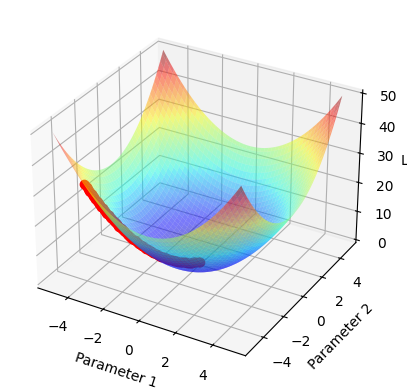

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example loss function (e.g., a simple quadratic)
def loss_function(x, y):
    return x**2 + y**2

# Generate a grid of values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = loss_function(x, y)

# Example optimizer path
path_x = np.linspace(-4, 0, 100)  # Simplified path for demonstration
path_y = np.linspace(-4, 0, 100)
path_z = loss_function(path_x, path_y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='jet')
ax.plot(path_x, path_y, path_z, color='r', marker='o')  # Optimizer path

# Set labels
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')

plt.show()


In [1]:
import torch

checkpoint_path = '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-2500'  # Replace with your actual checkpoint path

checkpoint = torch.load(checkpoint_path)
# Print some information from the checkpoint
print("Checkpoint's keys:", checkpoint.keys())
# You can add more specific prints depending on your checkpoint structure


IsADirectoryError: [Errno 21] Is a directory: '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-2500'

In [5]:
import os
import json

checkpoint_dir = '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-8000'

model_file = os.path.join(checkpoint_dir, 'adapter_model.safetensors')
if os.path.exists(model_file):
    print("Model file found:", model_file)
else:
    print("Model file not found.")

# Load and print the trainer state
trainer_state_file = os.path.join(checkpoint_dir, 'trainer_state.json')
if os.path.exists(trainer_state_file):
    with open(trainer_state_file, 'r') as file:
        trainer_state = json.load(file)
    print("Trainer State:", json.dumps(trainer_state, indent=4))
else:
    print("Trainer state file not found.")


Model file found: /opt/app-root/src/data/v8-finance-3/outputs/checkpoint-8000/adapter_model.safetensors
Trainer State: {
    "best_metric": 1.2606815099716187,
    "best_model_checkpoint": "/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-7500",
    "epoch": 2.0638503708481135,
    "eval_steps": 50,
    "global_step": 8000,
    "is_hyper_param_search": false,
    "is_local_process_zero": true,
    "is_world_process_zero": true,
    "log_history": [
        {
            "epoch": 0.0,
            "learning_rate": 2.0000000000000002e-07,
            "loss": 2.1854,
            "step": 1
        },
        {
            "epoch": 0.01,
            "learning_rate": 4.000000000000001e-06,
            "loss": 2.1805,
            "step": 20
        },
        {
            "epoch": 0.01,
            "learning_rate": 8.000000000000001e-06,
            "loss": 2.0453,
            "step": 40
        },
        {
            "epoch": 0.01,
            "eval_loss": 1.8006333112716675,
       

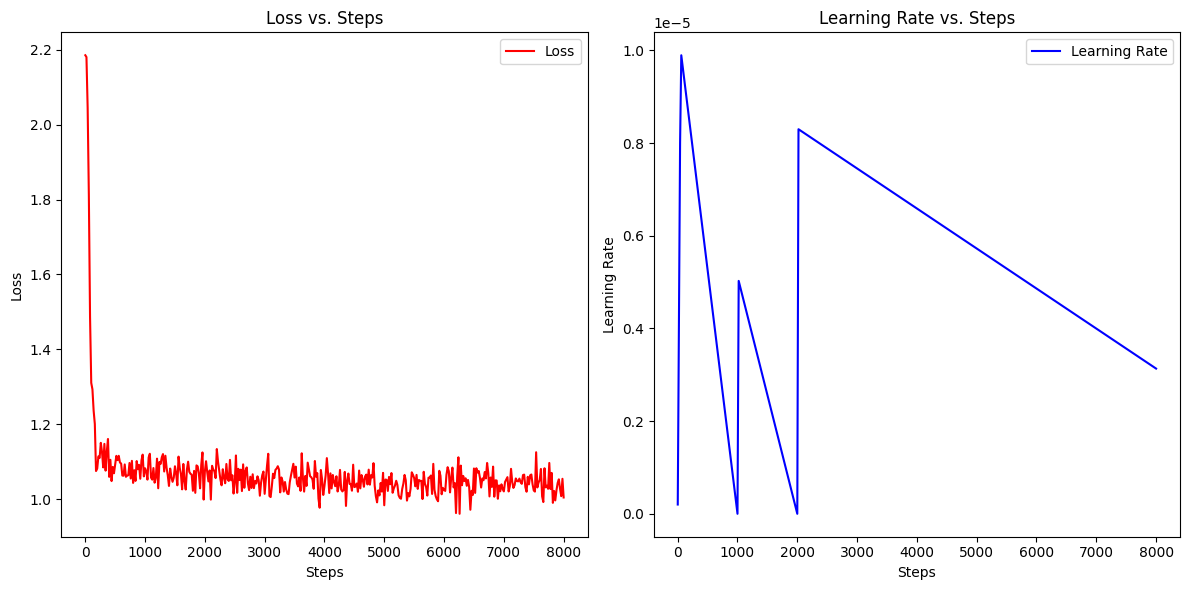

In [12]:


import json
import matplotlib.pyplot as plt

# Let's load the JSON data from the file
file_path =  '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-8000/trainer_state.json'


# Load the trainer state data
with open(file_path, 'r') as file:
    trainer_state = json.load(file)

# Extract the metrics, ensuring we only take steps that have both a loss and learning rate
steps_with_loss = [log_entry['step'] for log_entry in trainer_state['log_history'] if 'loss' in log_entry]
losses = [log_entry['loss'] for log_entry in trainer_state['log_history'] if 'loss' in log_entry]

steps_with_lr = [log_entry['step'] for log_entry in trainer_state['log_history'] if 'learning_rate' in log_entry]
learning_rates = [log_entry['learning_rate'] for log_entry in trainer_state['log_history'] if 'learning_rate' in log_entry]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Loss vs. Steps with loss
plt.subplot(1, 2, 1)
plt.plot(steps_with_loss, losses, label='Loss', color='red')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss vs. Steps')
plt.legend()

# Plot for Learning Rate vs. Steps with learning rate
plt.subplot(1, 2, 2)
plt.plot(steps_with_lr, learning_rates, label='Learning Rate', color='blue')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs. Steps')
plt.legend()

plt.tight_layout()
plt.show()





In [24]:
import pandas as pd
import json

file_path = '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-8000/trainer_state.json'

# Read the file content
with open(file_path, 'r') as file:
    trainer_state_data = json.load(file)

# Normalize the nested 'log_history' data into a flat table
df = pd.json_normalize(trainer_state_data, record_path=['log_history'])

# Now create a single pivot table for average loss and learning rate per epoch
if 'loss' in df.columns and 'learning_rate' in df.columns:
    pivot_table = pd.pivot_table(df, values=['loss', 'learning_rate'], index='epoch')
    # pivot_table.to_csv('/opt/app-root/src/data/pivot_table.csv')
    print(pivot_table)
else:
    print("The expected keys are not in the dataframe. Please check the dataframe columns.")


       learning_rate     loss
epoch                        
0.00    2.000000e-07  2.18540
0.01    6.000000e-06  2.11290
0.02    9.789474e-06  1.64950
0.03    9.368421e-06  1.30175
0.04    8.947368e-06  1.21840
...              ...      ...
2.02    3.280359e-06  1.00585
2.03    3.245811e-06  1.01000
2.04    3.211263e-06  1.04790
2.05    3.176714e-06  1.01745
2.06    3.142166e-06  1.02925

[207 rows x 2 columns]


In [25]:
import pandas as pd
import json

# Path to the JSON file
file_path = '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-8000/trainer_state.json'

# Read the file content
with open(file_path, 'r') as file:
    trainer_state_data = json.load(file)

# Normalize the nested 'log_history' data into a flat table
df = pd.json_normalize(trainer_state_data, record_path=['log_history'])

# Filter out the required columns
filtered_df = df[['epoch', 'learning_rate', 'loss', 'step']].dropna()

# Save the filtered data as a CSV file
csv_file_path = '/opt/app-root/src/data/training_data.csv'
filtered_df.to_csv(csv_file_path, index=False)
